We start by pulling the party id and LTV. These figures<b> include </b> refunds and chargebacks!

In [ ]:
# set  seed to .101;
# select bt.partyid,sum(transactionamount) as lifetime_party_revenue
# from fact_billingtransaction bt
# join fact_billingsubscription bs on bs.billingsubscriptionid = bt.billingsubscriptionid and bs.data_source_id =
# bt.data_source_id
# where resulttypecd in ('SUCC','BTCH','MANL')
# and cancellationnumber is not null  
# and bt.data_source_id = 1  
# group by bt.partyid
# order by random()
# limit 100000

Now I read in the data to R

In [2]:
data <- read.delim("100k_id_rev.csv")

##Summary Statistics on Party_ID. 

In [6]:
length(data[,1])
summary(data[,1])

[1] 100000

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   97040 36320000 51290000 52120000 68830000 90900000 

Note that the the X axis is just the party ID. If Pary ID is related to time, I would expect to more party IDs that have higher numerical values as more people sign up as the time goes on. Not sure why there is a large bump after ~20m. I would also expect more people to be sampled from IDs with more digits.

<div>
    <a href="https://plot.ly/~max.roth/156/" target="_blank" title="" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/156.png" alt="" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:156" src="https://plot.ly/embed.js" async></script>
</div>

##Summary Statistics LTV

In [6]:
summary(data[,2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-157.20    2.95    3.95   30.82   38.90 1228.00 

Sending the LTV data to plotly, we won't execute this in the notebook here. Notice most of the transactions are trials. The next biggest bump is being billed for one month. I cut of the few users with LTV over 500 or under -50.

In [2]:
# py <- plotly()
# trace1 <- list(
#   x=filter(data, lifetime_party_revenue<500&lifetime_party_revenue>-50)[,2],
#   type="histogram"
# )
# response <- py$plotly(trace1, kwargs=list(filename="line-scatter", fileopt="overwrite"))
# url <- response$url

<div>
    <a href="https://plot.ly/~max.roth/131/" target="_blank" title="Histogram of  LTV" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/131.png" alt="Histogram of  LTV" style="max-width: 100%;width: 1022px;"  width="1022" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:131" src="https://plot.ly/embed.js" async></script>
</div>

##Summary Gender
Looking at gender we see that women use the service, at least self identify, far more than men. This is just a random sample from the database

In [16]:
justgen <- read.table("justgen.csv", header=TRUE, quote="\"")
table(justgen)

justgen
    F     M 
69085 30915 

## Summary Resume Count
Looking at resume count, we see the bulk of the data is people with under 10 resumes. There are 321/100,000 party ids with more thank 10 resumes. Looking at the histogram of people with under 10 resumes

In [15]:
library(dplyr)
`rescount` <- read.table("100k_just_res_count.csv", header=TRUE, quote="\"")
rescnt=unlist(rescount)
rescnt=as.data.frame(rescnt)
summary(rescnt)
dim(filter(rescnt, rescnt<100))
dim(filter(rescnt, rescnt<50))
dim(filter(rescnt, rescnt<30))
dim(filter(rescnt, rescnt<10))
summary(filter(rescnt, rescnt<10))


     rescnt       
 Min.   :  1.000  
 1st Qu.:  1.000  
 Median :  1.000  
 Mean   :  1.571  
 3rd Qu.:  2.000  
 Max.   :381.000  

[1] 99998     1

[1] 99992     1

[1] 99984     1

[1] 99679     1

     rescnt     
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.522  
 3rd Qu.:2.000  
 Max.   :9.000  

Send to Plotly


In [ ]:
# 
# #Send to plotly
# py <- plotly()
# trace1 <- list(
#   x=filter(rescnt, rescnt<10)$rescnt,
#   type="histogram"
# )
# response <- py$plotly(trace1, kwargs=list(filename="Num Resumes", fileopt="overwrite"))
# url <- response$url

<div>
    <a href="https://plot.ly/~max.roth/188/" target="_blank" title="Number of Resumes Frequency" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/188.png" alt="Number of Resumes Frequency" style="max-width: 100%;width: 1022px;"  width="1022" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:188" src="https://plot.ly/embed.js" async></script>
</div>

Sending this to plotly slows down the whole document, this will just have to do in R.

In [1]:
#Send to plotly
#py <- plotly()
#trace1 <- list(
#  x=data[,1],
#  y=data[,2],
#  mode = "markers",
#  type="scatter"
#  )
#response <- py$plotly(trace1, kwargs=list(filename="Scatter", fileopt="overwrite"))
#url <- response$url


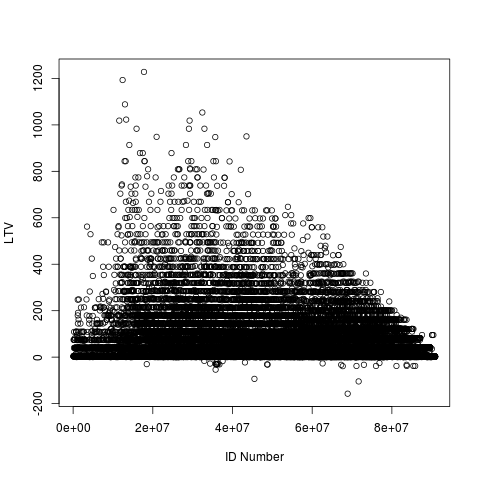

In [5]:
plot(data[,1],data[,2], xlab="ID Number", ylab="LTV")

It was hypothesized that there would be a relation between party ID and lifetime revenue. Because IDs are serially assigned, simply because of inflation, party ID would be positively correlated with LTV.

This visualization looks promising that there is no relation between party ID and lifetime revenue. However, let’s group the IDs and see if we can see anything more subtle.

Another thing to notice is a handful of <b> negative LTV </b> party IDs. Looking into these ID's I found that these are customers who likely called their credit card provider first to dispute the charge, then called us to cancel/get a refund. 

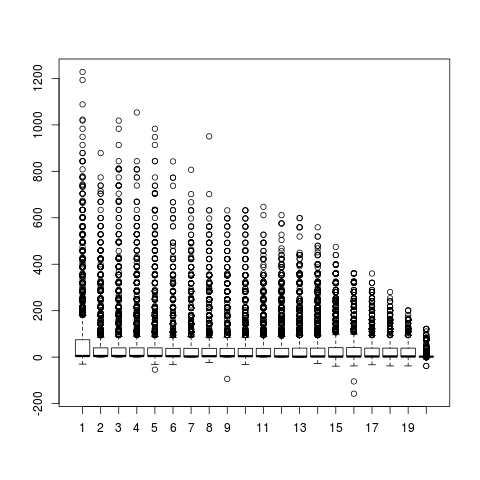

In [7]:
index=as.vector(sapply(1:20,function(x) rep(x,5000)))
dat2=cbind(data[order(data$partyid),],index)
boxplot(lifetime_party_revenue~index,data=dat2)

We still have to zoom in but this tells us that the poeple who signed up a while ago have had the posibility of being billed for longer.

In [8]:
index=as.vector(sapply(1:200,function(x) rep(x,500)))
dat2=cbind(data[order(data$partyid),],as.factor(index))
names(dat2)=c("partyid","rev","group")
x=aggregate(dat2$rev,by=list(dat2$group),FUN=mean)

# py <- plotly()
# trace1 <- list(
#   x=x[,1],
#   y=x[,2],
#   mode = "markers",
#   type="scatter"
# )
# layout<- list(
#   title="Grouped IDs V Average LTV",
#   xaxis = list(
#     title = "Grouped PartyID", 
#     showgrid = FALSE, 
#     zeroline = FALSE
#   ), 
#   yaxis = list(
#     title = "LTV", 
#     showline = FALSE
#   ))
# response <- py$plotly(trace1, kwargs=list(layout=layout,filename="LTV Trend dense", fileopt="overwrite"))
# url <- response$url


<div>
    <a href="https://plot.ly/~max.roth/181/" target="_blank" title="Grouped IDs V Average LTV" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/181.png" alt="Grouped IDs V Average LTV" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:181" src="https://plot.ly/embed.js" async></script>
</div>

A denser plot

In [ ]:
# 
# index=as.vector(sapply(1:2000,function(x) rep(x,50)))
# summary(index)
# dat2=cbind(data[order(data$partyid),],as.factor(index))
# names(dat2)=c("partyid","rev","group")
# x=aggregate(dat2$rev,by=list(dat2$group),FUN=mean)
# py <- plotly()
# trace1 <- list(
#   x=x[,1],
#   y=x[,2],
#   mode = "markers",
#   type="scatter"
# )
# layout<- list(
#   title="Grouped IDs V Average LTV",
#   xaxis = list(
#     title = "Grouped PartyID", 
#     showgrid = FALSE, 
#     zeroline = FALSE
#   ), 
#   yaxis = list(
#     title = "LTV", 
#     showline = FALSE
#   ))
# response <- py$plotly(trace1, kwargs=list(layout=layout,filename="LTV Trend dense", fileopt="overwrite"))
# url <- response$url


<div>
    <a href="https://plot.ly/~max.roth/183/" target="_blank" title="Grouped IDs V Average LTV" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/183.png" alt="Grouped IDs V Average LTV" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:183" src="https://plot.ly/embed.js" async></script>
</div>

This is interesting. It, perhaps, debunks the hypothesis of increasing charges over time.

We now have a broad feel for the data we are working with. Here is my working SQL querry to get Part ID, LTV, Gender, Last Expiration Date, Resume Count, Charaters in resume with greatest charactars ie Max(Char), Average charactars in all user's resumes. 

In [ ]:
# select mn2.partyid, ltv,gender,expirydate,resumecount, maxchar,avchar
# from(
#   select main.partyid, LTV, fp.gender, bs.expirydate, fpm.resumecount
#   from (select bt.partyid,sum(transactionamount) as LTV
#         from fact_billingtransaction bt
#         join fact_billingsubscription bs on bs.billingsubscriptionid = bt.billingsubscriptionid and bs.data_source_id = bt.data_source_id
#         where resulttypecd in ('SUCC','BTCH','MANL')
#         and cancellationnumber is not null
#         and bt.data_source_id = 1
#         group by bt.partyid
#         order by random()
#   ) main join fact_person fp on main.partyid = fp.partyid
#   join fact_billingsubscription bs on main.partyid = bs.partyid
#   join fact_personmetadata fpm on fpm.partyid =  main.partyid
#   where fp.gender in ('M','F')
#   and fpm.resumecount is not null
#   and bs.expirydate >= Convert(datetime, '2013-01-01' )
# ) mn2 join (select partyid,max(charlength) as maxchar,avg(charlength) as avchar from fact_docmetadata group by partyid) fdm on fdm.partyid= mn2.partyid
# order by random()
# limit 100000

##Random Forest

We use BigML to put together a random forest. I chose to predict LTV with Gender, Resume Count and Average Characters. There is a ton of error in the model. Clearly, average characters and resume count will be correlated. We need more uncorrelated variables to improve this model. However, it is a good start showing the prediction process.

<iframe src="https://bigml.com/embedded/model/yk80Ux7t59UMLIQPQTNT4SdGEqQ" frameborder="0" allowtransparency="true" allowfullscreen="allowfullscreen" width="600" height="400"></iframe>